In [1]:

import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt


In [2]:
data = pd.read_excel("Online_Retail.xlsx")


In [3]:
data.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
data= data[pd.notnull(data['CustomerID'])]


In [6]:
filtered_data=data[['Country','CustomerID']].drop_duplicates()


<Axes: xlabel='Country'>

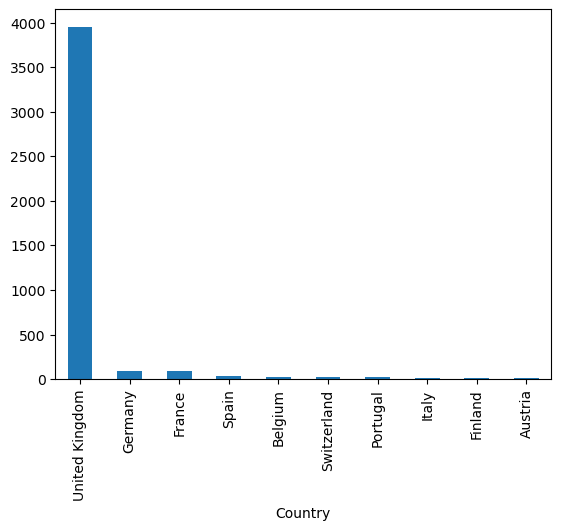

In [7]:
#Top ten country's customer
filtered_data.Country.value_counts()[:10].plot(kind='bar')


In [8]:
uk_data=data[data.Country=='United Kingdom']


In [9]:
uk_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 361878 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    361878 non-null  object        
 1   StockCode    361878 non-null  object        
 2   Description  361878 non-null  object        
 3   Quantity     361878 non-null  int64         
 4   InvoiceDate  361878 non-null  datetime64[ns]
 5   UnitPrice    361878 non-null  float64       
 6   CustomerID   361878 non-null  float64       
 7   Country      361878 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.8+ MB


In [10]:
uk_data.describe()


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,361878.000000,361878,361878.000000,361878.000000
mean,11.077029,2011-07-10 23:48:12.301493760,3.256007,15547.871368
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 17:25:00,1.250000,14194.000000
50%,4.000000,2011-07-31 13:07:00,1.950000,15514.000000
75%,12.000000,2011-10-23 11:39:00,3.750000,16931.000000
max,80995.000000,2011-12-09 12:49:00,38970.000000,18287.000000
std,263.129266,NaN,70.654731,1594.402590


In [11]:
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [12]:
uk_data = uk_data[(uk_data['Quantity']>0)]

In [13]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354345 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    354345 non-null  object        
 1   StockCode    354345 non-null  object        
 2   Description  354345 non-null  object        
 3   Quantity     354345 non-null  int64         
 4   InvoiceDate  354345 non-null  datetime64[ns]
 5   UnitPrice    354345 non-null  float64       
 6   CustomerID   354345 non-null  float64       
 7   Country      354345 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.3+ MB


In [14]:
uk_data=uk_data[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]
uk_data

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice
0,17850.0,2010-12-01 08:26:00,536365,6,2.55
1,17850.0,2010-12-01 08:26:00,536365,6,3.39
2,17850.0,2010-12-01 08:26:00,536365,8,2.75
3,17850.0,2010-12-01 08:26:00,536365,6,3.39
4,17850.0,2010-12-01 08:26:00,536365,6,3.39
...,...,...,...,...,...
541889,15804.0,2011-12-09 12:31:00,581585,12,1.95
541890,13113.0,2011-12-09 12:49:00,581586,8,2.95
541891,13113.0,2011-12-09 12:49:00,581586,24,1.25
541892,13113.0,2011-12-09 12:49:00,581586,24,8.95


In [15]:
uk_data['InvoiceDate'].min(),uk_data['InvoiceDate'].max()


(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:49:00'))

In [16]:
PRESENT = dt.datetime(2011,12,10)
uk_data['InvoiceDate'] = pd.to_datetime(uk_data['InvoiceDate'])


In [17]:
uk_data["total"]=uk_data["Quantity"]*uk_data["UnitPrice"]
uk_data["total"]

0          15.30
1          20.34
2          22.00
3          20.34
4          20.34
           ...  
541889     23.40
541890     23.60
541891     30.00
541892    214.80
541893     70.80
Name: total, Length: 354345, dtype: float64

In [18]:
rfm= uk_data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'total': lambda price: price.sum()})
rfm

,InvoiceDate,InvoiceNo,total
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,12,178.05


In [19]:
money= uk_data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days})
money

,InvoiceDate
CustomerID,
12346.0,325
12747.0,2
12748.0,0
12749.0,3
12820.0,3
...,...
18280.0,277
18281.0,180
18282.0,7


In [20]:
freq= uk_data.groupby('CustomerID').agg({'total': lambda price: price.sum()})
freq

,total
CustomerID,
12346.0,77183.60
12747.0,4196.01
12748.0,33719.73
12749.0,4090.88
12820.0,942.34
...,...
18280.0,180.60
18281.0,80.82
18282.0,178.05


In [21]:
recency= uk_data.groupby('CustomerID').agg({'InvoiceNo': lambda num: len(num)})
recency

,InvoiceNo
CustomerID,
12346.0,1
12747.0,103
12748.0,4596
12749.0,199
12820.0,59
...,...
18280.0,10
18281.0,7
18282.0,12


In [24]:
rfm=pd.concat([recency,freq,money], axis=1)
recency.columns=["Recency"]
freq.columns=["Frequency"]
money.columns=["Monetary"]
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,1,77183.60,325
12747.0,103,4196.01,2
12748.0,4596,33719.73,0
12749.0,199,4090.88,3
12820.0,59,942.34,3
...,...,...,...
18280.0,10,180.60,277
18281.0,7,80.82,180
18282.0,12,178.05,7


In [25]:
rfm['r_quartile'] = pd.qcut(rfm['Recency'], 4, [1,2,3,4])
rfm['f_quartile'] = pd.qcut(rfm['Frequency'], 4, [4,3,2,1])
rfm['m_quartile'] = pd.qcut(rfm['Monetary'], 4, [4,3,2,1])


In [26]:
rfm.head()


,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346.0,1,77183.60,325,1,1,1
12747.0,103,4196.01,2,4,1,4
12748.0,4596,33719.73,0,4,1,4
12749.0,199,4090.88,3,4,1,4
12820.0,59,942.34,3,3,2,4


In [27]:
rfm['RFM_Score'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()


,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
12346.0,1,77183.60,325,1,1,1,111
12747.0,103,4196.01,2,4,1,4,414
12748.0,4596,33719.73,0,4,1,4,414
12749.0,199,4090.88,3,4,1,4,414
12820.0,59,942.34,3,3,2,4,324


In [28]:
# Filter out Top/Best cusotmers
rfm[rfm['RFM_Score']=='111'].sort_values('Monetary', ascending=False).head()


,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
16754.0,2,2002.4,372,1,1,1,111
12346.0,1,77183.6,325,1,1,1,111
15749.0,10,44534.3,235,1,1,1,111
16698.0,5,1998.0,226,1,1,1,111
13135.0,1,3096.0,196,1,1,1,111


KeyError: 0